In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# Displaying the Data set for given excel
dt=pd.read_csv(r"D:\ML_Pro\extracted_features_charrec_dense7.csv")
print(dt)
dt.shape

              0         1          2    3          4          5          6  \
0     27.630783  0.000000  51.067493  0.0  26.302004   0.000000   0.000000   
1     41.934185  0.000000  57.616398  0.0  40.345722   0.000000   0.000000   
2     59.681458  0.000000  35.450397  0.0  51.084698   0.000000   0.000000   
3     25.652845  0.000000  42.711246  0.0  26.391441   0.000000   0.000000   
4     51.862490  0.000000  25.455917  0.0  48.505250   0.000000   0.000000   
...         ...       ...        ...  ...        ...        ...        ...   
6652   0.000000  8.917019  12.606703  0.0   0.000000  23.875010   0.000000   
6653  12.088920  3.646342  28.106102  0.0   0.000000   0.000000   0.000000   
6654   0.000000  0.000000  53.899130  0.0   0.000000   0.000000  12.079654   
6655   0.000000  0.000000  37.811558  0.0   0.000000   0.000000   8.555406   
6656   0.000000  0.000000  29.105694  0.0   0.000000   8.669491  20.568624   

        7    8         9  ...         55         56   57       

(6657, 65)

In [75]:
import numpy as np

# Load the CSV file using numpy.genfromtxt()
data = np.genfromtxt(r"D:\ML_Pro\extracted_features_charrec_dense7.csv", delimiter=',', skip_header=1)

# Extract feature vectors and class labels
X = data[:, :-1]
y = data[:, -1]

# Save the data as a NumPy file
np.savez('extracted_features_charrec_dense7.npz', X=X, y=y)

In [3]:
# It will display the mean, count and standard deviation for every feature(column)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class_name
count,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.0,6657.000000,...,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.0,6657.000000
mean,21.167244,7.914853,26.955550,0.001694,22.496025,3.155892,0.566073,0.000942,0.0,25.541555,...,4.556751,18.894252,0.001973,10.986298,25.483393,0.853183,21.327060,17.278656,0.0,3365.858194
std,21.048915,11.119147,34.284395,0.044561,24.870716,9.028120,3.395978,0.040107,0.0,35.277036,...,11.053910,26.166480,0.075321,13.966302,28.379510,3.459574,29.444840,20.342259,0.0,24.817513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3333.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3353.000000
50%,16.735703,2.248540,16.052292,0.000000,15.782615,0.000000,0.000000,0.000000,0.0,10.701322,...,0.000000,8.076521,0.000000,5.125904,17.266066,0.000000,9.578491,9.162153,0.0,3362.000000
75%,34.614826,11.951107,40.553830,0.000000,37.320180,0.000000,0.000000,0.000000,0.0,38.489910,...,0.821449,27.168510,0.000000,18.787160,43.938200,0.000000,30.630342,28.160164,0.0,3374.000000
max,113.655290,58.710968,194.724120,1.568933,149.866410,73.601400,34.719303,2.378994,0.0,192.633940,...,74.291320,168.736980,4.984689,79.050310,171.163060,34.583378,147.329130,92.224130,0.0,3454.000000


In [43]:
np.unique(data)

array([0.0000000e+00, 3.4163892e-04, 4.6131015e-04, ..., 3.4530000e+03,
       3.4540000e+03,           nan])

In [44]:
zero_rows_mask = (data==0).any(axis=1)
class1= data[zero_rows_mask]
class1

array([[0.0000000e+00, 1.0000000e+00, 2.0000000e+00, ..., 6.2000000e+01,
        6.3000000e+01,           nan],
       [2.7630783e+01, 0.0000000e+00, 5.1067493e+01, ..., 1.7512865e+00,
        0.0000000e+00, 3.3330000e+03],
       [4.1934185e+01, 0.0000000e+00, 5.7616398e+01, ..., 0.0000000e+00,
        0.0000000e+00, 3.3330000e+03],
       ...,
       [0.0000000e+00, 0.0000000e+00, 5.3899130e+01, ..., 3.5561680e+00,
        0.0000000e+00, 3.4540000e+03],
       [0.0000000e+00, 0.0000000e+00, 3.7811558e+01, ..., 8.6731960e+00,
        0.0000000e+00, 3.4540000e+03],
       [0.0000000e+00, 0.0000000e+00, 2.9105694e+01, ..., 1.0945368e+01,
        0.0000000e+00, 3.4540000e+03]])

In [46]:
one_rows_mask = (data == 3.4540000e+03).any(axis=1)
class2=data[one_rows_mask]
class2

array([[   0.       ,    3.5745394,   31.44596  , ...,    0.       ,
           0.       , 3454.       ],
       [   0.       ,    9.891518 ,   17.99879  , ...,    0.       ,
           0.       , 3454.       ],
       [   0.       ,    9.891518 ,   17.99879  , ...,    0.       ,
           0.       , 3454.       ],
       ...,
       [   0.       ,    0.       ,   53.89913  , ...,    3.556168 ,
           0.       , 3454.       ],
       [   0.       ,    0.       ,   37.811558 , ...,    8.673196 ,
           0.       , 3454.       ],
       [   0.       ,    0.       ,   29.105694 , ...,   10.945368 ,
           0.       , 3454.       ]])

In [47]:
class1_mean=np.mean(class1,axis=0)
class1_mean

array([2.11640650e+01, 7.91381419e+00, 2.69518020e+01, 2.14462955e-03,
       2.24932471e+01, 3.15616873e+00, 5.66889562e-01, 1.99274912e-03,
       1.20156203e-03, 2.55390708e+01, 1.50195254e-03, 1.37763389e+01,
       1.94425229e+01, 1.95253830e-03, 9.89621271e+00, 1.11150111e+01,
       8.08283737e+00, 5.07279939e+00, 5.42116136e+00, 3.00610459e+00,
       2.48206431e+01, 3.49970436e-03, 2.00004690e+01, 3.45728632e-03,
       1.21155515e+01, 2.09974147e+01, 1.97919425e+01, 4.58779008e-03,
       6.20922150e+00, 4.56586166e+00, 1.84829555e+01, 2.32302234e+01,
       1.78147708e+01, 5.03462489e-03, 1.70091452e+01, 2.36594399e+01,
       2.15367095e+01, 9.40076497e+00, 2.81532049e+01, 5.85761490e-03,
       6.33655636e-03, 6.15800541e-03, 6.30820066e-03, 1.62146790e+01,
       1.72135670e+01, 9.13586270e-03, 9.04098796e+00, 7.05917693e-03,
       2.29048647e+01, 2.39353939e+01, 2.51922196e+01, 2.02161108e+01,
       1.07057127e+01, 1.36692212e+01, 2.62519140e+01, 4.56432748e+00,
      

In [48]:
class2_mean=np.mean(class2,axis=0)
class2_mean

array([3.08873725e-01, 4.51882946e+00, 2.32652721e+01, 0.00000000e+00,
       6.13063538e-03, 6.38133830e+00, 1.17533702e+00, 0.00000000e+00,
       0.00000000e+00, 2.06835095e+00, 0.00000000e+00, 3.01200804e+01,
       6.47107266e-01, 0.00000000e+00, 2.68240291e+01, 1.21178108e-01,
       2.85584096e-01, 4.91457960e-01, 9.51970463e-02, 0.00000000e+00,
       1.30042711e+01, 0.00000000e+00, 2.27852753e+01, 0.00000000e+00,
       6.12551412e-02, 3.56783303e+01, 2.13403062e-01, 0.00000000e+00,
       3.90345352e+00, 7.06845185e-01, 2.68600932e+00, 5.37134608e+01,
       3.85758762e-01, 0.00000000e+00, 1.60112957e+01, 6.80371858e+00,
       8.85635129e-01, 3.09890838e-01, 4.50303709e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.87835975e+01,
       5.31888000e+00, 0.00000000e+00, 1.29383116e+00, 0.00000000e+00,
       4.63362573e-01, 1.77067369e+00, 2.70258468e+00, 5.47299323e+00,
       4.92194999e+01, 4.29354081e+01, 3.67850328e+01, 6.54965307e-01,
      

In [49]:
class1_std=np.std(class1,axis=0)
class1_std

array([21.0473523 , 11.11779953, 34.28060912,  0.05775069, 24.86801327,
        9.02679264,  3.39612094,  0.09468122,  0.09803598, 35.2723193 ,
        0.12254497, 17.41057016, 26.44772719,  0.15930846, 16.38474095,
       15.21442045, 10.82497747, 13.03241733, 11.89575697,  7.18128667,
       36.31162831,  0.25801792, 25.33521954,  0.28185349, 15.96513928,
       33.36006474, 25.50153716,  0.33220579, 10.98715562, 11.01949386,
       27.71488661, 21.93126399, 19.21575518,  0.40444775, 23.04065761,
       52.60134614, 24.99922902, 18.09490534, 31.22879568,  0.47792538,
        0.49036331,  0.50243437,  0.51468887, 13.97207974, 21.63158068,
        0.55570232, 12.37313783,  0.57596136, 30.26580933, 27.21329728,
       37.75986186, 22.64844302, 24.93397024, 20.59408703, 28.04414624,
       11.0695232 , 26.16650116,  0.70253035, 13.97608378, 28.37821978,
        3.53417785, 29.4444316 , 20.34658585,  0.77203331,         nan])

In [50]:
class2_std=np.std(class2,axis=0)
class2_std

array([ 1.92937436,  4.31497884,  9.41764764,  0.        ,  0.05449028,
        4.82075846,  3.38767154,  0.        ,  0.        ,  7.02836314,
        0.        ,  9.21275765,  4.20505436,  0.        ,  9.49264426,
        0.73542422,  1.52967829,  2.03303676,  0.84612986,  0.        ,
        8.70260542,  0.        ,  8.66391152,  0.        ,  0.42714113,
        9.55893183,  1.16161317,  0.        ,  4.01277341,  3.73092354,
        4.69622926, 12.34486777,  1.9396718 ,  0.        ,  6.46127372,
        8.7057292 ,  6.35209506,  2.75437001,  2.64155609,  0.        ,
        0.        ,  0.        ,  0.        , 10.77487161,  8.61691375,
        0.        ,  3.32196463,  0.        ,  2.5910012 ,  2.60997874,
        4.33508515,  7.71827877, 19.88223326, 12.99035731, 10.2979112 ,
        2.20181964, 13.07346611,  0.        ,  0.50182558, 14.70478009,
        2.84680202,  7.46934795,  6.14730633,  0.        ,  0.        ])

In [51]:
np.linalg.norm(class1_mean-class2_mean)

nan

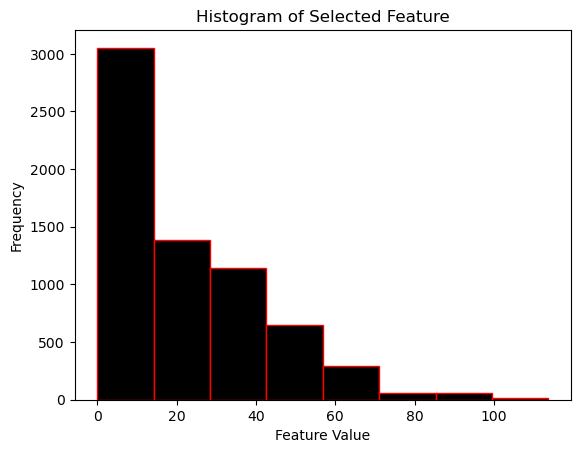

In [10]:
'A2'
selected_feature = dt['0']
num_bins =8
hist, bins = np.histogram(selected_feature, bins=num_bins)

plt.hist(selected_feature, bins=num_bins,  color='black', edgecolor='red')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Feature')
plt.show()

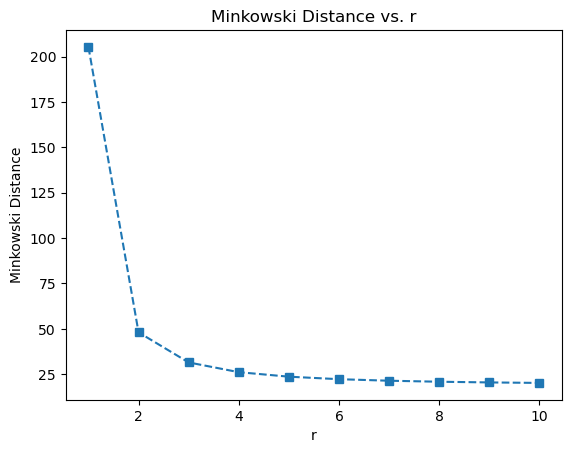

In [11]:
'A3'
vector1 = dt.iloc[0, :]  
vector2 = dt.iloc[1, :]  
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r)
    distances.append(distance)

plt.plot(r_values, distances, marker='s', linestyle='--')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.show()

In [56]:
'A4'
import numpy as np
from sklearn.model_selection import train_test_split
X = dt.iloc[:, :-1]
y = dt.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [20]:
y_test

2643    3359
3898    3364
2856    3360
2659    3359
3763    3363
        ... 
5237    3376
2939    3360
1330    3350
4790    3373
3221    3361
Name: class_name, Length: 1998, dtype: int64

In [70]:
'A4'
import numpy as np
from sklearn.model_selection import train_test_split



# Split data into features and labels
X = data[:, :-1]
y = data[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4659, 64)
y_train shape: (4659,)
X_test shape: (1998, 64)
y_test shape: (1998,)


In [72]:
'A5'
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Split data into features and labels
X = data[:, :-1]
y = data[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
'A6'
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



# Split data into features and labels
X = data[:, :-1]
y = data[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
neigh.fit(X_train, y_train)

# Test the accuracy of the classifier on the test set
accuracy = neigh.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.6571571571571572


In [74]:
'A7'
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



# Split data into features and labels
X = data[:, :-1]
y = data[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
neigh.fit(X_train, y_train)

# Use the classifier to predict the class labels for the test set
y_pred = neigh.predict(X_test)

print("Predicted class labels:", y_pred)

Predicted class labels: [3362. 3334. 3372. ... 3352. 3356. 3337.]


In [68]:
'A8'
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Split data into features and labels
X = data[:, :-1]
y = data[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create kNN classifier with k=5
neigh = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
neigh.fit(X_train, y_train)

# Test the accuracy of the classifier on the test set
accuracy = neigh.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.6786786786786787


In [67]:
'A9'
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create kNN classifier with k=5
neigh = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
neigh.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = neigh.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(cr)

Confusion Matrix:
[[29  1  0 ...  0  0  0]
 [ 2 27  0 ...  0  0  0]
 [ 0  2 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 1  0  0 ...  0  9  0]
 [ 0  0  0 ...  1  0 10]]
Classification Report:
              precision    recall  f1-score   support

      3333.0       0.52      0.81      0.63        36
      3334.0       0.61      0.82      0.70        33
      3335.0       0.52      0.56      0.54        39
      3337.0       0.68      0.68      0.68        34
      3342.0       0.29      0.50      0.36        28
      3343.0       0.48      0.46      0.47        26
      3346.0       0.59      0.62      0.60        21
      3349.0       0.63      0.70      0.67        47
      3350.0       0.24      0.25      0.24        20
      3351.0       0.84      0.88      0.86        43
      3352.0       0.30      0.36      0.33        22
      3353.0       0.86      0.83      0.84        29
      3354.0       0.66      0.77      0.71        30
      3355.0       0.39      0.35      0.37   